In [10]:
import cv2
import matplotlib.pyplot as plt
import os

In [11]:
print(os.getcwd())

C:\Users\admin\Documents\test\2021_12_03


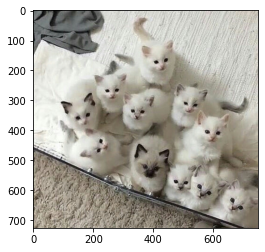

In [12]:
image = cv2.imread('./cats.jpg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
print(image.shape)
print(image.size)

(725, 750, 3)
1631250


In [14]:
print(image[100,100])


[117 120 118]


#  ROI

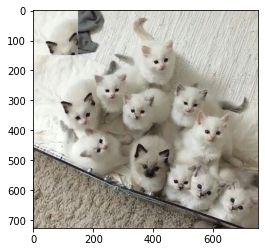

In [20]:
#간단한것부터 다시 이해해보자 
roi = image[200:350, 50:200]
image[0:150, 0:150] = roi # 이때 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
import cv2
import numpy as np

image = cv2.imread('./cats.jpg')
dst = np.zeros(image.shape, dtype=image.dtype) #이미지랑 같은 크기, 타입으로 numpy ndarray 생성


<class 'numpy.ndarray'>


In [30]:
#뭔지 알수가 없구나!!!!
height, width, _ = image.shape
print(height, width)

#이걸 왜 나누는지를 모르겠네 .. 
N = 100
h = height // N
w = width // N

for i in range(height):
    for j in range(width):
        y = j * h
        x = j * w
        roi = image[y:y+h, x:x + w]
        dst[y:y+h, x:x+w] = cv2.mean(roi)[0:3]
        
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

725 750


In [15]:
#마우스로 ROI 영역 나타내기 

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./cats.jpg')
roi = cv2.selectROI(image)
print(roi)
img = image[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]] #roi[0]= y, roi[3] =h, roi[1] = x, roi[2] = w
#(y,x,w,h)
#엔터를 누르면 값이 나옴 

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

(327, 292, 222, 199)


# 카메라로 영상 재생

In [3]:
import cv2 
import numpy as np

In [6]:
# 디바이스 장치로부터 frame을 하나씩 읽어와 생성된 창에 보여준다. 
cap = cv2.VideoCapture(0)

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH) # 프레임의 폭을 반환
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)#프레임의 높이를 반환
print(width)
print(height)
cap.set(3,320) # 3: width 4:height
cap.set(4,240) #cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320): 프레임의 폭을 320으로 변경합니다.

while True:
    ret, frame = cap.read()
        
    if not ret:
        print("비디오 읽기 오류")
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('video', gray)
        
    k = cv2.waitKey(0) & 0xFF
    if k == 27:
        break

            
cap.release()
cv2.destroyAllWindows()       

# 좀 시간이 걸리는데 나오는거 확인

640.0
480.0


In [21]:
#이게 더 잘됨 

cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:q
        
        #카메라에 잡힌 영상을 좌우 반전
        frame = cv2.flip(frame,1)
        
        #영상에 색을 바꾼다 
        frame2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        cv2.imshow('frame',frame2)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()


IndentationError: unexpected indent (Temp/ipykernel_8740/3010622819.py, line 10)

# 비디오 파일 불러오기

In [16]:
#재생이 끝나면 화면이 꺼짐
import cv2 

file = './Macro - 34855.mp4'
cap2 = cv2.VideoCapture(file)

while(cap2.isOpened()):
    ret, frame = cap2.read()
    
    if ret:
        cv2.imshow('Video', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'): # 키 q가 눌렸는지 확인합니다
            break
    else:
        break

cap2.release()
cv2.destroyAllWindows()

In [5]:
# 엔터키를 누를때마다 재생됨 
def readVideo(video_file):
    try:
        cap2 = cv2.VideoCapture(video_file)
        print("영상을 불러옵니다.")
    except:
        print("영상을 불러오는데 실패했습니다.")
        return
    
    while True:
        ret, frame = cap2.read()
        
        if not ret:
            print("영상 재생에 실패했습니다.")
            break
        
        cv2.imshow('Play Video', frame)
        k = cv2.waitKey(0) & 0xFF
        
        if k == 27: # ESC를 눌렀을 경우
            break
            
    print(cap2.get(3))
    print(cap2.get(4))
    cap2.release()
    cv2.destroyAllWindows()

In [6]:
readVideo('./Macro - 34855.mp4')

영상을 불러옵니다.
1280.0
720.0


# 비디오  녹화하고 저장하기

In [8]:
import cv2 
cap = cv2.VideoCapture(0)

fps = 20.0
width = int(cap.get(3))
height = int(cap.get(4))
fcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')
    
out = cv2.VideoWriter('mycam.mp4', fcc, fps, (width, height))
print('녹화를 시작합니다')


while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
        
    if not ret:
        print('비디오 읽기 오류')
        break
        
    cv2.imshow('Video', frame)
    out.write(frame)
        
    k = cv2.waitKey(0) & 0xFF
    if k == 27:
        print('녹화를 종료합니다')
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()


녹화를 시작합니다
녹화를 종료합니다


In [9]:
def writeVideo():
    try:
        print("카메라를 구동합니다.")
        cap = cv2.VideoCapture(0)
    except:
        print("카메라 구동 실패")
        return

    fps = 20.0
    width = int(cap.get(3))
    height = int(cap.get(4))
    fcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X') #코덱
    
    out = cv2.VideoWriter('mycam.mp4', fcc, fps, (width, height))
    print('녹화를 시작합니다')
    
    while True:
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1) # cv2.flip(그림, 1)그림 좌우반전하는 메소드 : 1은 좌우반전, 0은 상하반전 
        
        if not ret:
            print('비디오 읽기 오류')
            break
        
        cv2.imshow('Video', frame)
        out.write(frame)
        
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            print('녹화를 종료합니다')
            break
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [10]:
writeVideo()

카메라를 구동합니다.
녹화를 시작합니다
녹화를 종료합니다


In [11]:
readVideo('mycam.mp4')

영상을 불러옵니다.
영상 재생에 실패했습니다.
640.0
480.0


In [13]:
#이게 진짜다 
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
#fourcc = cv2.cv.CV_FOURCC(*'DIVX')
#out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
out = cv2.VideoWriter('output.mp4', -1, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,1)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

# 도형그리기 


In [4]:
import cv2
import numpy as np
import math
from random import shuffle


In [5]:
img = np.full((512, 512, 3), 255, np.uint8)

cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 5)
cv2.rectangle(img, (384, 8), (504, 200), (0, 255, 0), 10)
cv2.circle(img, (128, 128), 63, (0, 0, 255), -1)
cv2.ellipse(img, (256, 256), (100, 50), 30, 90, 180, (255, 0, 255), -1)
            
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
cv2.putText(img, 'OpenCV', (10, 500), font, 4, (0, 255, 255), 3)
    
cv2.imshow('drawing', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 마우스로 도형그리기 

In [6]:
#랜덤 색상을 위한 리스트 
b = [i for i in range(256)]
g = [i for i in range(256)]
r = [i for i in range(256)]

In [7]:
import random

#마우스 콜백에 쓰일 함수 구형
def onMouse(event, x, y, flage, param):
    global img
    #if event == cv2.EVENT_LBUTTONDBLCLK:
    if event == cv2.EVENT_FLAG_LBUTTON:

        #리스트 셔플 random.shuffle(리스트)
        random.shuffle(b), random.shuffle(g), random.shuffle(r)
        
        # 2는 선으로 원을 그림, -1을 색을 채워서 그림
        cv2.circle(param, (x, y), 50, (b[0], g[0], r[0]), -1)
        #cv2.circle(param, (x, y), 50, (b[0], g[0], r[0]), 2)
        
        cv2.imshow('paint', img)

In [8]:
#img = np.full((512, 512, 3), 0, np.uint8)
img = np.full((500, 500, 3), 255, dtype = np.uint8) # 캔버스

cv2.namedWindow('paint')
cv2.setMouseCallback('paint', onMouse, img)
    
while True:
    cv2.imshow('paint', img)
    if cv2.waitKey(0) == 27:
        break
    
cv2.destroyAllWindows()

# 마우스로 도형그리기 2

In [8]:
import random 
import cv2
import numpy as np
import math

canvas = np.full((512,512,3),0,dtype = np.uint8)

#랜덤 색상을 위한 리스트 
b = [i for i in range(256)]
g = [i for i in range(256)]
r = [i for i in range(256)]

#얘네들은 무엇인고
mode = True
drawing = False
ix, iy = -1, -1

In [9]:


def onMouse(event, x, y, flags, param):
    global ix, iy, drawing, mode, b, g, r, canvas
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y 
        random.shuffle(b), random.shuffle(g), random.shuffle(r)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            paint_img = canvas.copy()
            if mode:
                cv2.rectangle(param, (ix, iy), (x, y), (b[0], b[0], r[0]), -1)
                cv2.imshow('paint_mode', canvas)
            else:
                r = (ix-x)**2 + (iy-y)**2
                r = int(math.sqrt(r))
                cv2.circle(param, (ix, iy), r, (b[0], g[0], r[0]), -1) # 여기 에러 해결해야 
                cv2.imshow('paint_mode', canvas)
    elif event == cv2.EVENT_LBUTTONUP:
        if drawing:
            drawing = False

In [7]:
cv2.namedWindow('paint_mode')
cv2.setMouseCallback('paint_mode',onMouse, canvas)
while True:
    cv2.imshow('paint_mode', canvas)
       
    k = cv2.waitKey(0) & 0xFF
    if k == 27:
         break
            
    elif k == ord('m'):
        mode = not mode
cv2.destroyAllWindows()

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

# ROI

In [12]:
import cv2
import numpy as np
#Numpy array 슬라이싱으 통해 이미지 특정 부분을 가져오기

image = cv2.imread('./dog.jpg')
print(image.size)
print(image.shape)

x,y = 223, 555
h,w = 300, 45

subimg = image[x:x+h, y:y+w]
cv2.imshow('cutting',subimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

635400
(353, 600, 3)


In [13]:
cv2.rectangle(subimg, (0, 0), (w-1, h-1), (0, 255, 255), 5)
cv2.imshow('bounding_box', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
image[x:x+h, y-w:y] = subimg
cv2.imshow('modified', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 마우스로 지정후 잘라낸 이미지 저장 
import cv2
import numpy

#img3 = cv2.imread('image/14497276538643.jpg')
img3 = cv2.imread('dog.jpg')
drag = False
default_x, default_y, w, h = -1, -1, -1, -1
blue, yellow = (255, 0, 0), (0, 255, 255)

def onMouse(event, x, y, flags, param):
    global drag, default_x, default_y
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drag = True
        default_x = x
        default_y = y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drag:
            img_draw = img3.copy()
            cv2.rectangle(img_draw, (default_x, default_y), (x, y), blue, 2)
            cv2.imshow('Show Image', img_draw)
    
    elif event == cv2.EVENT_LBUTTONUP:
        if drag:
            drag = False
            w = x - default_x
            h = y - default_y
            
            if w > 0 and h > 0:
                img_draw = img3.copy()
                cv2.rectangle(img_draw, (default_x, default_y), (x, y), yellow, 2)
                cv2.imshow('Show Image', img_draw)
                
                roi = img3[ default_y:default_y+h, default_x:default_x+w ]
                cv2.imshow('cropped', roi)
                cv2.moveWindow('cropped', 500, 500)
                cv2.imwrite('./cropped1.jpg', roi)
            
            else:
                cv2.imshow('dragging', img3)
                print('drag should start from left-top side')

cv2.imshow('Show Image', img3)
cv2.setMouseCallback("Show Image", onMouse, param = img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

(-0.5, 264.5, 224.5, -0.5)

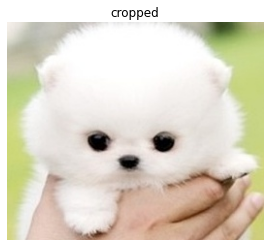

In [16]:
import matplotlib.pyplot as plt
cropped = cv2.imread('./cropped1.jpg')

b, g, r = cv2.split(cropped)
cropped = cv2.merge([r, g, b])

plt.title('cropped')
plt.imshow(cropped)
plt.axis('off')

In [20]:
import cv2
import numpy as np

image = cv2.imread('./dog.jpg')
drag = False
default_x, default_y, w, h = -1, -1, -1, -1
blue, yellow = (255,0,0), (0,255, 255)

def onMouse(event, x, y, flags, param):
    global drag, default_x, default_y 
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drag = True
        default_x = x
        default_y = y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drag : 
            img_draw = image.copy() #이미지 복사
            cv2.rectangle(img_draw, (default_x, default_y),(x,y),blue,2)
            cv2.imshow('Show Image', img_draw)
            
    elif event == cv2.EVENT_LBUTTONUP:
        if drag:
            drag = False
            w = x - default_x
            h = y - default_y
            
            if w > 0 and h > 0:
                img_draw = img3.copy()
                cv2.rectangle(img_draw, (default_x, default_y), (x, y), yellow, 2)
                cv2.imshow('Show Image', img_draw) # title 똑.같.이
        
                roi = image[default_y:default_y+h, default_x : default_x+w]
                cv2.imshow('cropped', roi)
                cv2.moveWindow('cropped', 500, 500) # 창이동
                cv2.imwrite('./cropped2.jpg', roi) # 이미지 저장
            else:
                cv2.imshow('dragging', image)
                print('drag should start from left-top side')
                
                
cv2.imshow('Show Image', img3)
cv2.setMouseCallback("Show Image", onMouse, param = img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

(-0.5, 162.5, 136.5, -0.5)

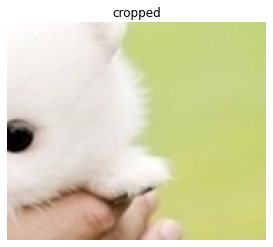

In [21]:
import matplotlib.pyplot as plt
cropped = cv2.imread('./cropped1.jpg')

#bgr을 rgb로
b, g, r = cv2.split(cropped)
cropped = cv2.merge([r, g, b])

plt.title('cropped')
plt.imshow(cropped)
plt.axis('off')

# 이미지 더하기 

In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def bgr_to_rgb(imgfile):
    b, g, r = cv2.split(imgfile)
    imgfile = cv2.merge([r, g, b])
    return imgfile
    

In [3]:
#add는 더하려는 이미지의 크키와 데이터 타입이 동일해야한다.
import cv2
def addImage(imageFile1, imageFile2):
    img1 = cv2.imread(imageFile1)
    img2 = cv2.imread(imageFile2)
    print(img1.shape)#(725, 750, 3)
    print(img2.shape)#(353, 600, 3)
    
    #크기가 맞지 않아서 리사이즈
    img2_resize = cv2.resize(img2,dsize=(750,725),interpolation=cv2.INTER_AREA)
    print(img2_resize.shape)
    
    cv2.imshow('img1', img1)
    cv2.imshow('img2', img2)
    
    add_img1 = img1 + img2_resize #연산 기호로 더한거
    add_img2 = cv2.add(img1, img2_resize) # cv2.add
    
    cv2.imshow('img1 + img2', add_img1)
    cv2.imshow('cv2.add', add_img2)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    
addImage('./cats.jpg','./dog.jpg')

(725, 750, 3)
(353, 600, 3)
(725, 750, 3)


In [ ]:
#이미지 처리..
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel('models/EDSR_x3.pb')
sr.setModel('edsr',3)

In [4]:
import cv2
#이미지 크기 조절하는 방법
src = cv2.imread('./cats.jpg', cv2.IMREAD_COLOR)

#사용자가 요구하는 절대 크기로 변경하는 방법
resize_image = cv2.resize(src, dsize=(640,480), interpolation=cv2.INTER_AREA)

#비율에 맞게 상대 크기로 변경하는 방법
resize_image2 = cv2.resize(src, dsize=(0,0), fx=0.3, fy=0.7, interpolation=cv2.INTER_LINEAR)

cv2.imshow('src', src)
cv2.imshow('resize1', resize_image)
cv2.imshow('resize2', resize_image2)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 이미지 블렌딩
이미지를 서로 합칠 때 가중치를 두어 합치는 방법 

In [6]:
import cv2
import numpy as np

img1 = cv2.imread('./cats.jpg')
img2 = cv2.imread('./dog.jpg')
print(img1.shape)#(725, 750, 3)
print(img2.shape)#(353, 600, 3)
    
#크기가 맞지 않아서 리사이즈
img2_resize = cv2.resize(img2,dsize=(750,725),interpolation=cv2.INTER_AREA)
print(img2_resize.shape)


def onChange(x):
    pass


(725, 750, 3)
(353, 600, 3)
(725, 750, 3)
